### Logistic Regression labsheet 5

### Imports

In [224]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.impute import SimpleImputer # used for handling missing data
from sklearn.metrics import classification_report

### Load the Data

In [225]:
dataset = pd.read_csv("./Datas/logist1.csv")
dataset

,x1,x2,y
0,4.5192,2.6487,1
1,2.4443,1.5438,1
2,4.2409,1.8990,1
3,5.8097,2.4711,1
4,6.4423,3.3590,1
...,...,...,...
95,5.9868,7.3641,0
96,4.6711,6.2592,0
97,7.5810,8.3703,0
98,4.6457,8.5676,0


In [226]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      100 non-null    float64
 1   x2      100 non-null    float64
 2   y       100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [227]:
x1 = np.array(dataset["x1"])
x2 = np.array(dataset["x2"])
y = np.array(dataset["y"])


No handles with labels found to put in legend.


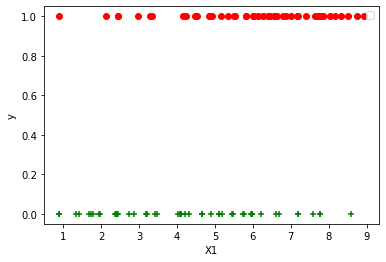

In [228]:
s = ['+', 'o']
color = {1: "red", 0: "green"}
shape = {1:'o', 0:'+'}
fig, ax = plt.subplots()
for i in range(len(x1)):
    plt.scatter(x1[i], y[i],c=color[y[i]], marker=shape[y[i]])
plt.xlabel("X1")
plt.ylabel("y")
plt.legend()
plt.show()


No handles with labels found to put in legend.


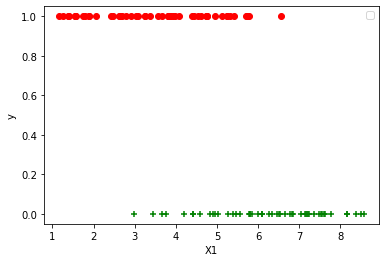

In [229]:
for i in range(len(x2)):
    plt.scatter(x2[i], y[i],c=color[y[i]], marker=shape[y[i]])
plt.xlabel("X1")
plt.ylabel("y")
plt.legend()
plt.show()

2.Plot a line y=(2x+3)

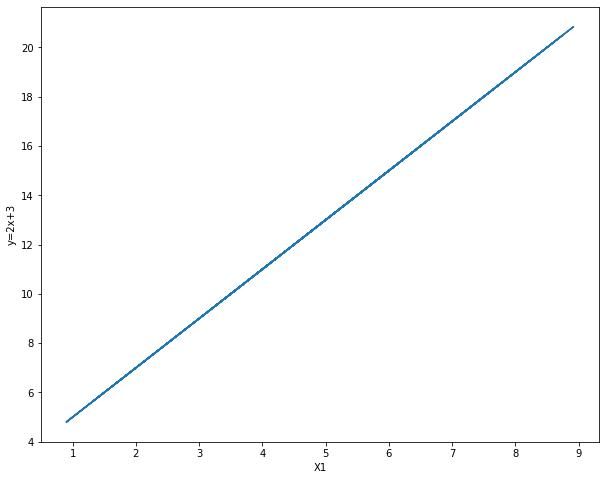

In [230]:
plt.figure(figsize=(10,8))
plt.plot(x1, 2*x1+3)
plt.xlabel("X1")
plt.ylabel("y=2x+3")
plt.show()

3.Define a function sigmoid(z) that takes one parameter z and computes 1/(1+e^-z).Create a vector  V  with 10  values  randomly  in  the  range  [-1000,1000].  Transform  V  to  V'  that consists of  respective sigmoid  values  using  the  defined  function.  Observe  the  range  of output values in V'.

In [231]:
V = np.random.randint(-1000,1000,10)
V_d = []

def sigmoid(z):
    v = 1/(1 + np.exp(-z))
    return v

for i in V:
    V_d.append(sigmoid(i))
print(V_d)
    

[0.0, 2.1705220113036392e-29, 3.468830023929216e-133, 0.0, 1.0, 0.0, 3.665820411179563e-77, 5.583037061001887e-85, 0.0, 1.0]


<ipython-input-231-76acbeede126>:5: RuntimeWarning: overflow encountered in exp
  v = 1/(1 + np.exp(-z))


4.Define a function hypothesis(theta, X) that takes two vectors as parameters, theta and X. If sigmoid(theta.X)>= 0.5, output 0 else output 1.

In [232]:
def hypothesis(theta, X):
    if sigmoid(theta.X)>=0.5:
        return 0
    else:
        return 1


5.Define a function cost(theta,X,y) to compute the error 

In [233]:
def cost(theta,X,Y):
    m= len(X)
    Error = (1/m)*(-Y * np.log(sigmoid(X)) - (1 - Y) * np.log(1 - sigmoid(X))).sum()
    return Error

PART B : Implementation of logistic regression

In [234]:
data = pd.read_csv("./Datas/logist2.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [235]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


<AxesSubplot:xlabel='Married', ylabel='count'>

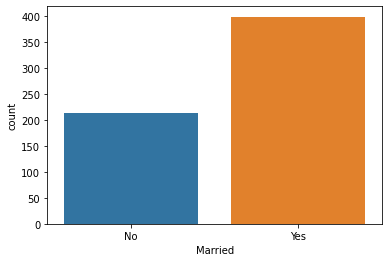

In [236]:
sns.countplot(x='Married',data=data)

In [237]:
## handling the data for married
data["Married"].isnull().sum()

3

In [238]:
data["Married"] = data["Married"].replace(np.NaN,"Yes")

<AxesSubplot:xlabel='Gender', ylabel='count'>

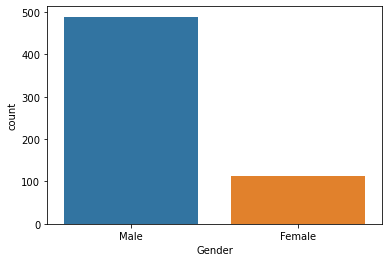

In [239]:
sns.countplot(x='Gender',data=data)

In [240]:
data["Gender"].isnull().sum()

13

In [241]:
## handling the data for Gender
data["Gender"] = data["Gender"].replace(np.NaN,"Male")

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

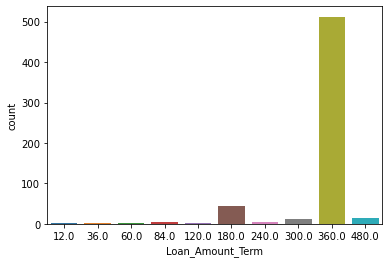

In [242]:
sns.countplot(x='Loan_Amount_Term',data=data)


In [243]:
data["Loan_Amount_Term"].isnull().sum()

14

In [244]:
##handling loan amt
data["Loan_Amount_Term"] = data["Loan_Amount_Term"].replace(np.NaN,'360')

In [245]:
# handling the loan amt
data["LoanAmount"].isnull().sum()

22

In [246]:
meanValue = data["LoanAmount"].mean()
print(meanValue)
data["LoanAmount"] =data["LoanAmount"].replace(np.NaN,meanValue)

146.41216216216216


<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

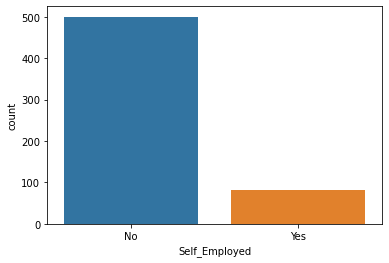

In [247]:
sns.countplot(x='Self_Employed',data=data)

In [248]:
data["Self_Employed"].isnull().sum()

32

In [249]:
data["Self_Employed"] = data["Self_Employed"].replace(np.NaN,'No')

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

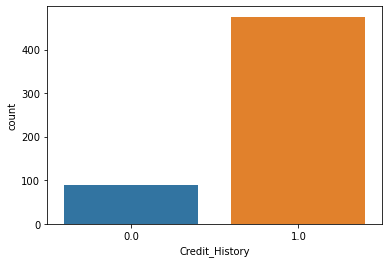

In [250]:
sns.countplot(x='Credit_History',data=data)

In [251]:
## handling the credit history missing values
data["Credit_History"].isnull().sum()

50

In [252]:
data["Credit_History"] = data["Credit_History"].replace(np.NaN,'1.0')

<AxesSubplot:xlabel='Dependents', ylabel='count'>

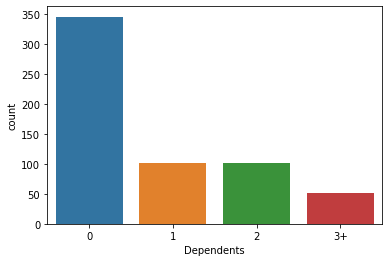

In [253]:
sns.countplot(x='Dependents',data=data)


In [254]:
data["Dependents"].isnull().sum()

15

In [255]:
data["Dependents"] = data["Dependents"].replace(np.NaN,'0')

In [256]:
data.Dependents == '3+'

0      False
1      False
2      False
3      False
4      False
       ...  
609    False
610     True
611    False
612    False
613    False
Name: Dependents, Length: 614, dtype: bool

In [257]:
data["Dependents"] = data["Dependents"].replace('3+','4')
(data.Dependents=='3+').sum()

0

## Encode all independent features

In [258]:
data.loc[data.Loan_Status=='N','Loan_Status']= 0
data.loc[data.Loan_Status=='Y','Loan_Status']=1

data.loc[data.Gender=='Male','Gender']= 0
data.loc[data.Gender=='Female','Gender']=1

data.loc[data.Married=='No','Married']= 0
data.loc[data.Married=='Yes','Married']=1

data.loc[data.Education=='Graduate','Education']= 0
data.loc[data.Education=='Not Graduate','Education']=1

data.loc[data.Self_Employed=='No','Self_Employed']= 0
data.loc[data.Self_Employed=='Yes','Self_Employed']=1

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

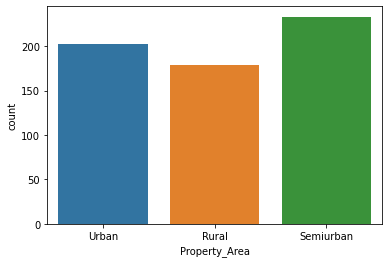

In [259]:
sns.countplot(x='Property_Area',data=data)


In [260]:
property_area = pd.get_dummies(data['Property_Area'],drop_first=True)


In [261]:
data= pd.concat([data,property_area],axis=1)

In [262]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Semiurban,Urban
0,LP001002,0,0,0,0,0,5849,0.0,146.412162,360.0,1.0,Urban,1,0,1
1,LP001003,0,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,Rural,0,0,0
2,LP001005,0,1,0,0,1,3000,0.0,66.000000,360.0,1.0,Urban,1,0,1
3,LP001006,0,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,Urban,1,0,1
4,LP001008,0,0,0,0,0,6000,0.0,141.000000,360.0,1.0,Urban,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,1,0,0,0,0,2900,0.0,71.000000,360.0,1.0,Rural,1,0,0
610,LP002979,0,1,4,0,0,4106,0.0,40.000000,180.0,1.0,Rural,1,0,0
611,LP002983,0,1,1,0,0,8072,240.0,253.000000,360.0,1.0,Urban,1,0,1
612,LP002984,0,1,2,0,0,7583,0.0,187.000000,360.0,1.0,Urban,1,0,1


### Without Library

### Training model using library

In [263]:
X= data.drop(['Loan_ID','Property_Area','Loan_Status'],axis=1)
Y = data['Loan_Status']
Y=Y.astype('int')
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

In [264]:
Y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [265]:
## feature scaling
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)
print(X_test)

[[-0.47374983 -1.40561644 -0.70504939 ...  0.41790088  1.28610033
  -0.70494767]
 [ 2.11081869 -1.40561644 -0.70504939 ...  0.41790088  1.28610033
  -0.70494767]
 [-0.47374983  0.71143163 -0.70504939 ...  0.41790088 -0.77754432
   1.41854501]
 ...
 [-0.47374983  0.71143163 -0.70504939 ...  0.41790088  1.28610033
  -0.70494767]
 [-0.47374983  0.71143163  2.59189586 ... -2.39291191 -0.77754432
   1.41854501]
 [-0.47374983  0.71143163  0.11918692 ...  0.41790088 -0.77754432
   1.41854501]]


In [266]:
logmodel = LogisticRegression()

In [267]:
logmodel.fit(X_train, Y_train)

LogisticRegression()

In [268]:
## Predictions
y_pred = logmodel.predict(X_test)

In [269]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.45      0.60        33
           1       0.83      0.98      0.90        90

    accuracy                           0.84       123
   macro avg       0.86      0.72      0.75       123
weighted avg       0.84      0.84      0.82       123



Evaluation

In [270]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)
cm

array([[15, 18],
       [ 2, 88]])

## Roc_auc curve

In [271]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr,tpr,threshold = roc_curve(Y_test,y_pred)
auc = roc_auc_score(Y_test,Y_test) 

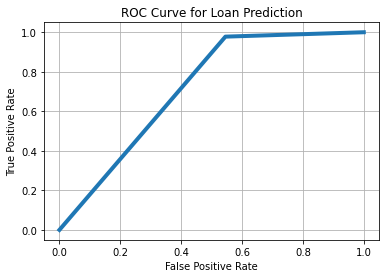

In [272]:
plt.plot(fpr,tpr,linewidth=4)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Loan Prediction")
plt.grid()